# This is Step 2 in the Pipeline - General Data Analysis
With this notebook we gain information about our problem and data. We will do this by looking at the data itself, and by the use of descriptive statistics and visualizations. We will also look at the correlation between the features and the target variable.

### Imports

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Parameters for Analysis

In [36]:
FINGERPRINT_FILE = './source/embedding/all_positive_tms_maccs/fingerprint.csv'
SPEC2VEC_EMBEDDING_FILE = './source/embedding/all_positive_tms_maccs/spec2vec.csv'

In [37]:
assert os.path.isfile(FINGERPRINT_FILE)
assert os.path.isfile(SPEC2VEC_EMBEDDING_FILE)
assert FINGERPRINT_FILE.endswith('.csv')
assert SPEC2VEC_EMBEDDING_FILE.endswith('.csv')

### Fingerprint Assessment

In [38]:
df = pd.read_csv(FINGERPRINT_FILE)
df.drop(columns=['name', 'inchi'], inplace=True)
df.set_index('inchi_key', inplace=True)

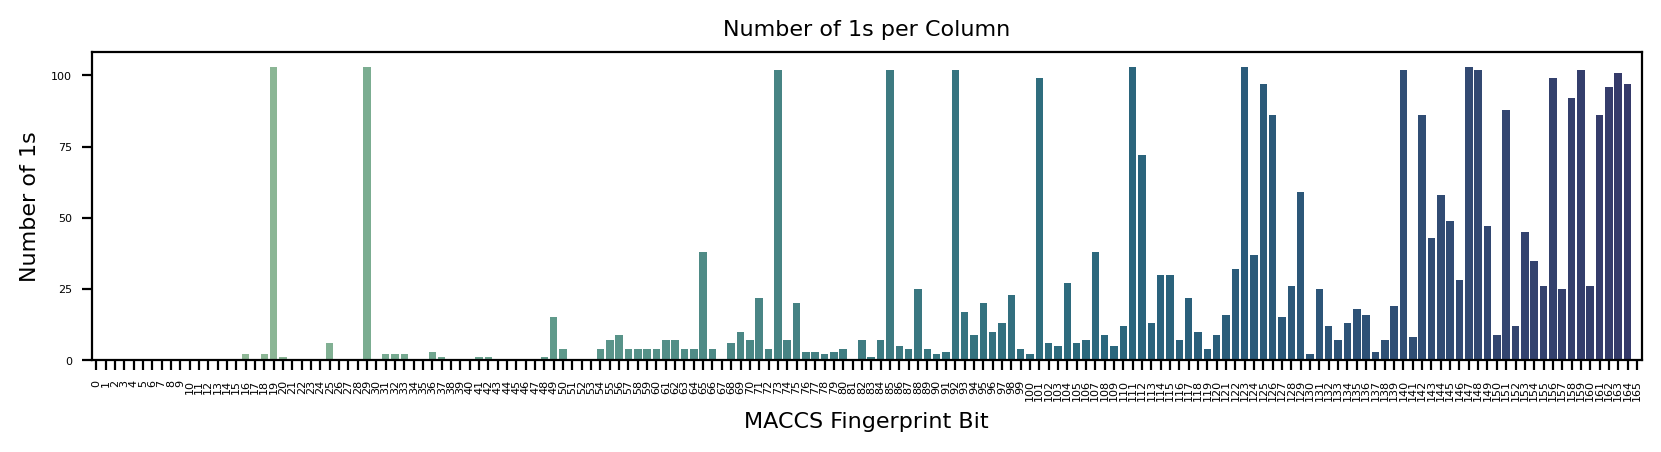

count    166.00000
mean      21.53012
std       32.66203
min        0.00000
25%        1.00000
50%        6.00000
75%       25.00000
max      103.00000
dtype: float64

In [39]:
fig, ax = plt.subplots(figsize=(10, 2), dpi=200)
sns.barplot(x=df.columns, y=df.sum(axis=0), ax=ax, palette="crest")

ax.set_title('Number of 1s per Column', fontsize=8)
ax.set_xlabel('MACCS Fingerprint Bit', fontsize=8)
ax.set_ylabel('Number of 1s', fontsize=8)

plt.xticks(rotation=90, fontsize=4)
plt.yticks(fontsize=4)
plt.show()

df.sum(axis=0).describe()

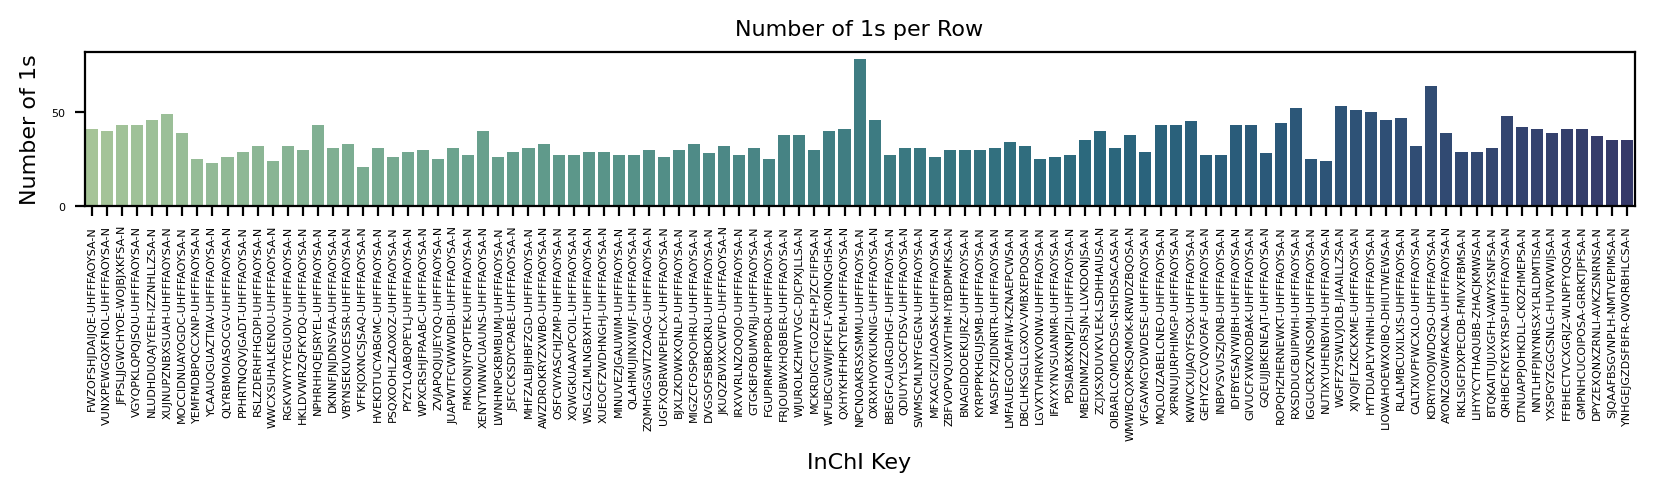

count    103.000000
mean      34.699029
std        9.233183
min       21.000000
25%       28.000000
50%       31.000000
75%       41.000000
max       78.000000
dtype: float64

In [40]:
fig, ax = plt.subplots(figsize=(10, 1), dpi=200)
sns.barplot(x=df.index, y=df.sum(axis=1), ax=ax, palette="crest")

ax.set_title('Number of 1s per Row', fontsize=8)
ax.set_xlabel('InChI Key', fontsize=8)
ax.set_ylabel('Number of 1s', fontsize=8)

plt.xticks(rotation=90, fontsize=4)
plt.yticks(fontsize=4)
plt.show()

df.sum(axis=1).describe()

### Spectra Embedding Assessment

In [41]:
spectra = pd.read_csv(SPEC2VEC_EMBEDDING_FILE)

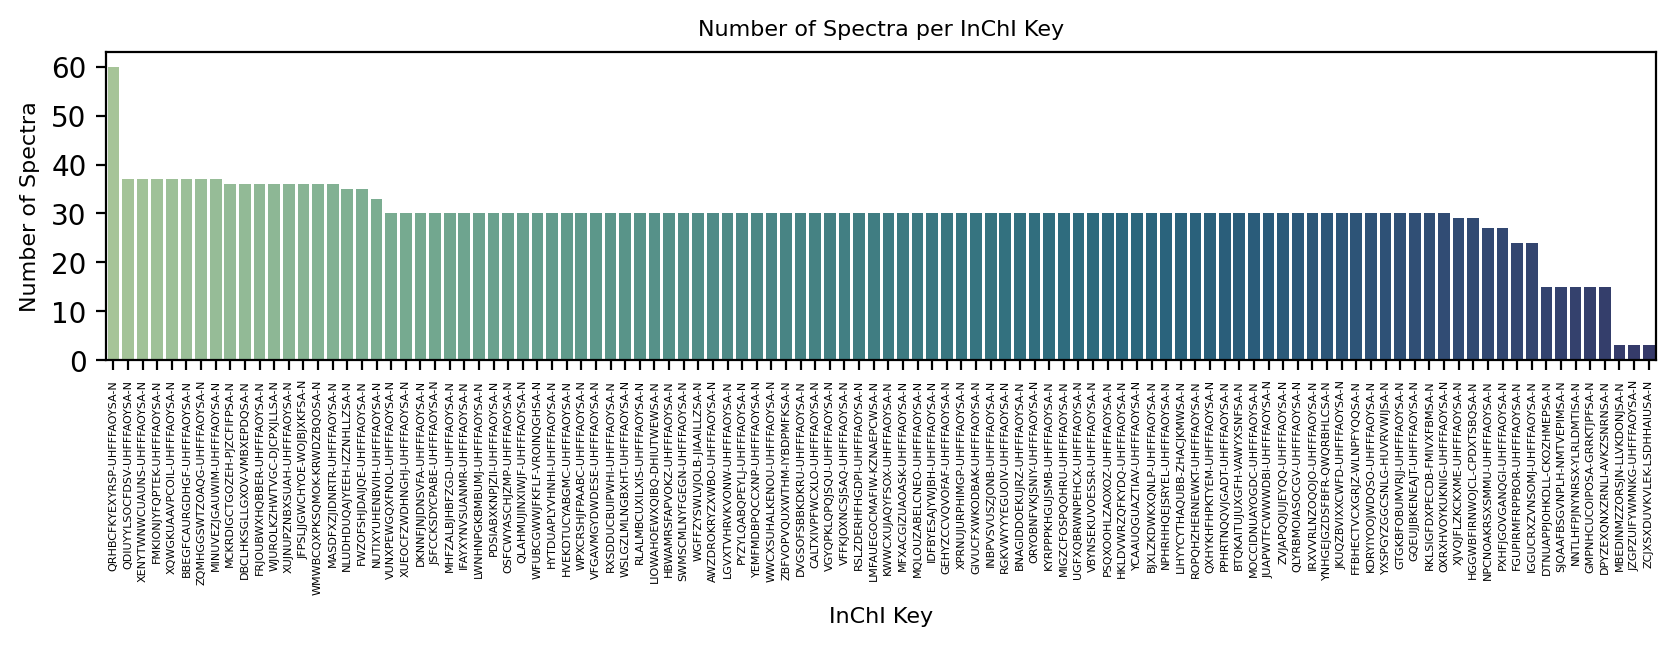

In [42]:
count_by_inchi_key = spectra['inchi_key'].value_counts()
plt.figure(figsize=(10, 2), dpi=200)
sns.barplot(x=count_by_inchi_key.index, y=count_by_inchi_key.values, palette="crest")

plt.title('Number of Spectra per InChI Key', fontsize=8)
plt.xlabel('InChI Key', fontsize=8)
plt.ylabel('Number of Spectra', fontsize=8)
plt.xticks(rotation=90, fontsize=4)
plt.yticks([0, 10, 20, 30, 40, 50 ,60])
plt.show()